<a href="https://colab.research.google.com/github/ipunn/Kaggle_Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
test_set_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle-Titanic/test.csv")
train_set_raw = test_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle-Titanic/train.csv")

In [ ]:
train_set_raw.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
train_set = train_set_raw[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
train_set = train_set.dropna(axis=0,how='any')
train_set.info()

test_set = test_set_raw[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

train_set = pd.get_dummies(train_set)
test_set = pd.get_dummies(test_set)

for column in test_set.columns:
    test_set[column].fillna(test_set[column].mode()[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


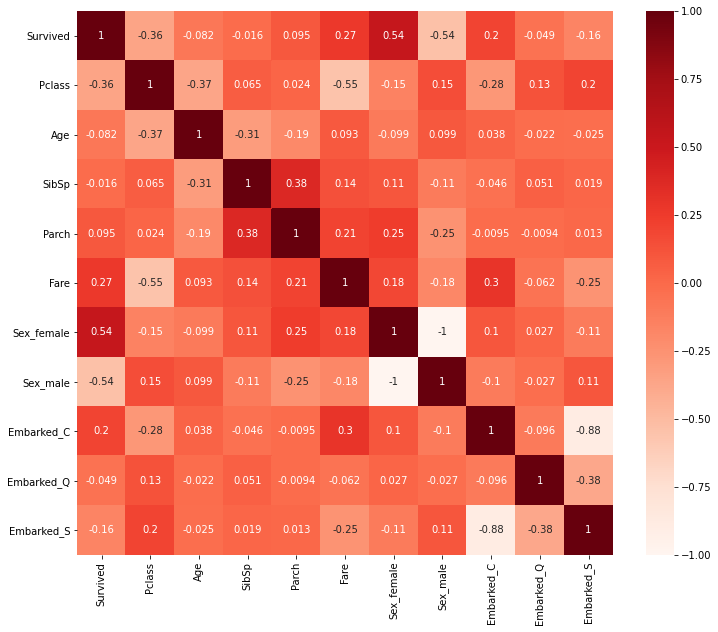

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_set.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Survived"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.19]
print(relevant_features)

Survived      1.000000
Pclass        0.356462
Fare          0.266100
Sex_female    0.536762
Sex_male      0.536762
Embarked_C    0.195673
Name: Survived, dtype: float64


In [ ]:
train_set_filter = train_set[['Survived','Pclass','Fare','Sex_female','Embarked_C']]
test_set_filter = test_set[['Pclass','Fare','Sex_female','Embarked_C']]

In [ ]:
y = train_set['Survived']
X = train_set.drop(columns='Survived')
X_test_set = test_set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1885)
reg = LogisticRegression().fit(X_train, y_train)
print("SCORE", reg.score(X_test, y_test))
print(X.columns)
print(reg.intercept_, reg.coef_)

prediction['Survived'] = pd.DataFrame(reg.predict(X_test_set))
output = test_set_raw[['PassengerId']].join(prediction['Survived'],how='left')
output.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle-Titanic/prediction1.csv',index=False)

SCORE 0.7850467289719626
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
[2.45439111] [[-1.17999332e+00 -4.24622533e-02 -3.37162785e-01 -3.85544444e-02
   1.45185559e-03  2.09352479e+00 -4.93198755e-01  1.02613622e+00
  -2.22663140e-02  5.96456128e-01]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y = train_set_filter['Survived']
X = train_set_filter.drop(columns='Survived')
X_test_set = test_set_filter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1885)
reg = LogisticRegression().fit(X_train, y_train)
print("SCORE", reg.score(X_test, y_test))
print(X.columns)
print(reg.intercept_, reg.coef_)

prediction['Survived'] = pd.DataFrame(reg.predict(X_test_set))
output = test_set_raw[['PassengerId']].join(prediction['Survived'],how='left')
output.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle-Titanic/prediction2.csv',index=False)

SCORE 0.7710280373831776
Index(['Pclass', 'Fare', 'Sex_female', 'Embarked_C'], dtype='object')
[0.52556275] [[-8.85866860e-01  7.05740354e-04  2.44050178e+00  5.30564655e-01]]


[Text(167.4, 181.2, 'X[2] <= 0.5\ngini = 0.488\nsamples = 498\nvalue = [288, 210]'),
 Text(83.7, 108.72, 'X[1] <= 26.269\ngini = 0.339\nsamples = 315\nvalue = [247, 68]'),
 Text(41.85, 36.23999999999998, 'gini = 0.236\nsamples = 212\nvalue = [183, 29]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.471\nsamples = 103\nvalue = [64, 39]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 2.5\ngini = 0.348\nsamples = 183\nvalue = [41, 142]'),
 Text(209.25, 36.23999999999998, 'gini = 0.126\nsamples = 118\nvalue = [8, 110]'),
 Text(292.95, 36.23999999999998, 'gini = 0.5\nsamples = 65\nvalue = [33, 32]')]

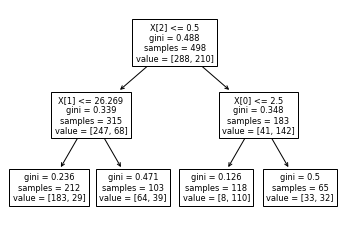

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=1885)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [ ]:
# cost_complexity_pruning_path()